In [2]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *
import chart_studio.plotly as py

data_DIR = "../fdata/rapm/"
export_DIR = "./fdata/"

fig_DIR = "../figs/rapm/"

%matplotlib widget

In [3]:
def build_player_list(possessions):
    p = [possessions.iloc[:,i].unique() for i in range(10)]
    players = list(set(chain(*p)))
    players.sort()
    return players

def get_prior_map(cts,prior_weight,n):
    scts = np.sort(cts)
    idx_h = int(len(cts)/2)
    # linear prior map
    # prior_map = np.linspace(-1,1,scts[-1]+1)
    # log based prior map
    prior_map1 = -prior_weight/2*(np.logspace(0,-n,scts[idx_h]+1)-10**(-n))
    prior_map2 = prior_weight/2*(np.flipud(np.logspace(0,-n,scts[-1] - scts[idx_h]))-10**(-n))
    prior_map = np.concatenate([prior_map1,prior_map2])
    
    return prior_map

# Compare Single Season RAPM with Prior

In [ ]:
league = "NBA"
season = "2022"
year = int(season)
n = -1
sort_col = "RAPM_R_wP"

In [ ]:
df1 = pd.read_csv(export_DIR + "single_season/" + league + "_RAPM_" + season + "_wP.csv")
df2 = pd.read_csv(export_DIR + "single_season/" + league + "_RAPM_" + season + ".csv")
df2 = df2[["Player","RAPM","RAPM_R"]]
df3 = pd.merge(df1,df2, on="Player", suffixes=("_wP", ""))
df3["Diff"] = df3["RAPM_wP"] - df3["RAPM"]
df3["Diff_R"] = -df3["RAPM_R_wP"] + df3["RAPM_R"]
df3.insert(13,"Possessions",df3.pop("Possessions"))
df3.insert(13,"Prior",df3.pop("Prior"))
df3 = df3.drop(columns=["Year","ORAPM","DRAPM","ORAPM_R","DRAPM_R"])
df3 = df3.sort_values(by=sort_col).reset_index(drop=True)
df3 = df3.rename(columns ={"RAPM_R":"RAPM_Rank","RAPM_R_wP":"RAPM_Rank_wP"})
df = df3.head(n).copy()

In [ ]:
df.head(10)

In [ ]:
x_var = "RAPM"
var = "RAPM_wP"
fig_10 = px.scatter(df, x=x_var, y=var,width=800, height=600, hover_name="Player",hover_data=["RAPM","RAPM_wP","Possessions","RAPM_Rank","RAPM_Rank_wP"],color_discrete_sequence =["blue"])
fig_line = px.line(df, x = "RAPM", y = "RAPM",color_discrete_sequence=["black"])
fig = go.Figure(data = fig_10.data + fig_line.data)
fig.update_layout( width=800, height=600, showlegend=True)
fig.update_layout( title=dict(
                        text="RAPM vs RAPM with Prior 10 " + season + "-" + str(year+1)[-2:],
                        xanchor="auto",
                        yanchor="middle",
                        font=dict(family="Arial, Tahoma, Helvetica", size=25, color="Black")
                    ),
            )
fig.update_xaxes(title_text=x_var)
fig.update_yaxes(title_text=var)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()
# fig.write_image(fig_DIR + "RAPM_vs_RAPM_wP_"+ season + "_" + f"{multi}_yr.png", scale=5)
py.plot(fig, filename = "RAPM_vs_RAPM_wP_10", auto_open = True)

In [ ]:
sdfsdf

In [ ]:
prior_weight = 5

In [ ]:
possessions = pd.read_parquet(data_DIR + league +"_rapm_possessions_" + season + ".parquet")
print(len(possessions))
player_list = build_player_list(possessions)
possessions["PPP"] = 100 * possessions["pts"]
p = possessions.iloc[:,:10].to_numpy()
puq, cts = np.unique(p.flatten(), return_counts=True) 
scts = np.sort(cts)
idx_h = int(len(cts)/2)
# linear prior map
# prior_map = np.linspace(-1,1,scts[-1]+1)
# log based prior map
prior_map10 = get_prior_map(cts,prior_weight,1)
prior_map15 = get_prior_map(cts,prior_weight,1.5)
prior_map20 = get_prior_map(cts,prior_weight,2)

In [ ]:
quantiles = ['25%','50%', '75%']
desc  = df["Possessions"].describe()

In [ ]:
desc["max"]

In [ ]:
fig,ax = plt.subplots(1,1)
sns.set_style("white")
sns.scatterplot(x = cts,y = prior_map10[cts],ax=ax, color = "blue")
sns.scatterplot(x = cts,y = prior_map15[cts],ax=ax, color = "red")
sns.scatterplot(x = cts,y = prior_map20[cts],ax=ax, color = "green")
ax1 = ax.twinx() 
sns.kdeplot(df,x = "Possessions", ax = ax1, color ="coral")
for i in range(3):
    ax.axvline(desc[quantiles[i]], color = "black")
    ax.text(x=desc[quantiles[i]]+100,y = prior_weight/2-0.2, s = quantiles[i])
ax.set_title("Possessions Based Prior for RAPM",fontsize =14, fontweight = "bold")
ax.set_xlabel("Possessions Played")
ax.set_ylabel("Prior")
ax.set_xlim([0,desc["max"]+500])
ax.legend(["1","1.5","2"], title="Power", loc = "center right")
ax1.legend(["Possession Density"], loc = "lower right")
fig.tight_layout()
plt.savefig(fig_DIR + "rapm_poss_based_prior.png", dpi=300)

# Compare RAPM Trends

In [4]:
season_start = 2015
season_end = 2023
league = "NBA"
seasons = np.arange(season_start, season_end, 1).astype(str)
dfa = []
for season in seasons:
    df1 = pd.read_csv(export_DIR + "single_season/" + league + "_RAPM_" + season + "_wP.csv",)
    dfa.append(df1)
data = pd.concat(dfa)
data["Type"] = "RAPM_wP"

In [5]:
season_start = 2015
season_end = 2023
seasons = np.arange(season_start, season_end, 1).astype(str)
dfa = []
for season in seasons:
    df1 = pd.read_csv(export_DIR + "single_season/" + league + "_RAPM_" + season + ".csv",)
    dfa.append(df1)
data1 = pd.concat(dfa)
data1["Type"] = "RAPM"

In [6]:
theme_rapm = themes.theme_minimal(base_size=9, base_family="Tahoma")
theme_rapm += theme(
    plot_background = element_rect(fill = 'ghostwhite', color = "ghostwhite"),
    plot_title=element_text(face="bold", size=16),
    strip_text=element_text(face="bold", size=10),
    plot_caption=element_text(size=10),
    plot_subtitle=element_text(size=12),
    axis_text_x=element_text(size=8),
    axis_text_y=element_text(size=8),
    axis_title_x=element_text(size=12),
    axis_title_y=element_text(size=12),
)

In [11]:
# df = data[data["RAPM_R"]<30]
players_select = ["Stephen Curry", "LeBron James", "Chris Paul", "James Harden", "Kawhi Leonard", "Draymond Green","Kevin Durant",
                  "Nikola Jokic", "Joel Embiid"]#, "Luka Doncic"]
players_select = ["LeBron James","Kevin Durant", "Nikola Jokic", "Joel Embiid"]#, "Luka Doncic"]
players_select = ["Paul George"]
df = data[data["Player"].isin(players_select)]
df1 = data1[data1["Player"].isin(players_select)]

# df2 = pd.merge(df,df1, on=["Player","Year"], suffixes=["_wP",""])
df2 = pd.concat([df,df1])

In [12]:
# df2

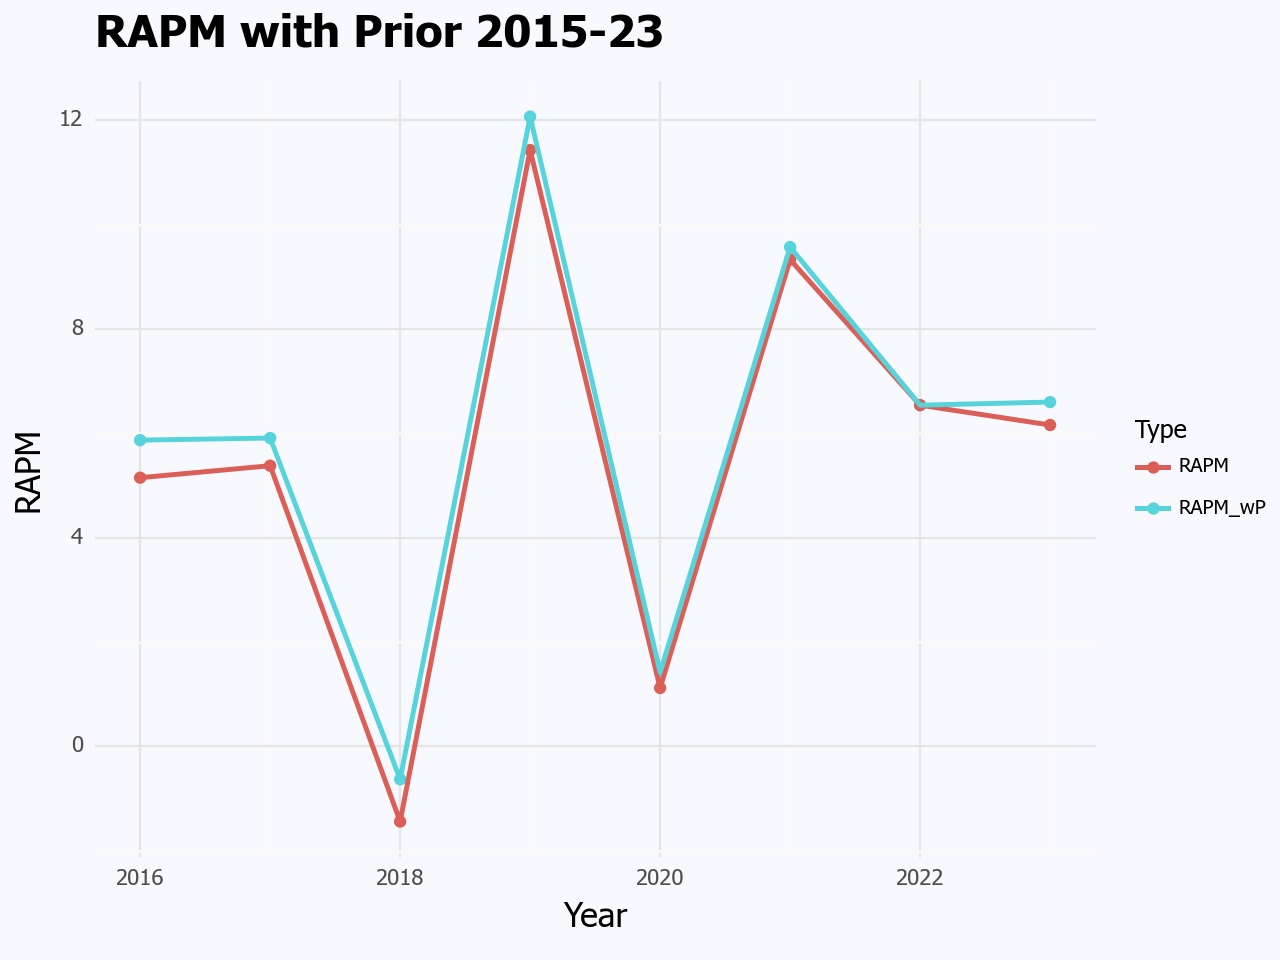

In [13]:
p = (
    ggplot(df2,aes(x="Year",y = "RAPM", group ="Type", color = "Type"))
    + geom_point()
    + geom_line(size=1)
    # + geom_line(aes(x="Year",y = "RAPM_wP", group = "Player"))
    # + geom_line(aes(x="Year",y = "RAPM_wP"),size=2)
    # + scale_color_manual(["b","r","g","c","y","k","orange","violet","gold"])
    # + scale_color_manual(values=["black","red"])
    + theme_rapm
    + labs(
        title = "RAPM with Prior 2015-23"
    )
)
# p.save(fig_DIR + "rapm_wP_2015_2023.png",dpi=300)
p.draw()

In [14]:
fghg

NameError: name 'fghg' is not defined

No such comm: 27f8877513a346d5a4969bf4ca8a7bb0


# Compare Multi Year RAPM with Prior

In [ ]:
league = "NBA"
season = "2023"
multi = 3
n = -1
sort_col = "RAPM_R_wP"

In [ ]:
season_start = 2015
season_end = 2023
seasons = np.arange(season_start, season_end, 1).astype(str)
dfa = []
for season in seasons:
    df1 = pd.read_csv(export_DIR + "multi_season/" + league + "_RAPM_" + season + "_" + f"{multi}_yr_wP.csv",)
    dfa.append(df1)
data = pd.concat(dfa)

In [ ]:
# df = data[data["RAPM_R"]<30]
players_select = ["Stephen Curry", "LeBron James", "Chris Paul", "James Harden", "Kawhi Leonard", "Draymond Green","Kevin Durant",
                  "Nikola Jokic", "Joel Embiid"]#, "Luka Doncic"]
df = data[data["Player"].isin(players_select)]

In [ ]:
theme_rapm = themes.theme_minimal(base_size=9, base_family="Tahoma")
theme_rapm += theme(
    plot_background = element_rect(fill = 'ghostwhite', color = "ghostwhite"),
    plot_title=element_text(face="bold", size=16),
    strip_text=element_text(face="bold", size=10),
    plot_caption=element_text(size=10),
    plot_subtitle=element_text(size=12),
    axis_text_x=element_text(size=8),
    axis_text_y=element_text(size=8),
    axis_title_x=element_text(size=12),
    axis_title_y=element_text(size=12),
)

In [ ]:
df.columns

In [ ]:
p = (
    ggplot(df,aes(x="Year",y = "ORAPM", group="Player", color ="Player"))
    + geom_point()
    + geom_line()
    # + scale_color_manual(["b","r","g","c","y","k","orange","violet","gold"])
    + scale_color_discrete()
    + theme_rapm
)
p.draw()

# Compare RAPM with and without Prior

## For same Prior Maps

In [ ]:
league = "NBA"
season = "2023"
multi = 3
n = -1
sort_col = "RAPM_R_wP"

In [ ]:
df1 = pd.read_csv(export_DIR + "multi_season/" + league + "_RAPM_" + season + "_" + f"{multi}_yr_wP.csv")
df2 = pd.read_csv(export_DIR + "multi_season/" + league + "_RAPM_" + season + "_" + f"{multi}_yr.csv")
df2 = df2[["Player","RAPM","RAPM_R"]]
df3 = pd.merge(df1,df2, on="Player", suffixes=("_wP", ""))
df3["Diff"] = df3["RAPM_wP"] - df3["RAPM"]
df3["Diff_R"] = -df3["RAPM_R_wP"] + df3["RAPM_R"]
df3.insert(13,"Possessions",df3.pop("Possessions"))
df3.insert(13,"Prior",df3.pop("Prior"))
df3 = df3.drop(columns=["Year","ORAPM","DRAPM","ORAPM_R","DRAPM_R"])
df3 = df3.sort_values(by=sort_col).reset_index(drop=True)
df = df3.head(n).copy()

In [ ]:
x_var = "RAPM"
var = "RAPM_wP"
fig_10 = px.scatter(df, x=x_var, y=var,width=800, height=600, hover_name="Player",hover_data=["RAPM","RAPM_wP","Possessions"],color_discrete_sequence =["blue"])
fig_line = px.line(df, x = "RAPM", y = "RAPM",color_discrete_sequence=["black"])
fig = go.Figure(data = fig_10.data + fig_line.data)
fig.update_layout( width=800, height=600, showlegend=True)
fig.update_layout( title=dict(
                        text="3 Year RAPM vs RAPM with Prior 2021-24",
                        xanchor="auto",
                        yanchor="middle",
                        font=dict(family="Arial, Tahoma, Helvetica", size=25, color="Black")
                    ),
            )
fig.update_xaxes(title_text=x_var)
fig.update_yaxes(title_text=var)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()
# fig.write_image(fig_DIR + "RAPM_vs_RAPM_wP_"+ season + "_" + f"{multi}_yr.png", scale=5)
py.plot(fig, filename = "RAPM_vs_RAPM_wP", auto_open = True)

## For different Prior Maps

In [ ]:
# df1 = pd.read_csv(export_DIR + league + "_RAPM_" + season + "_wP.csv")
# df2 = pd.read_csv(export_DIR + league + "_RAPM_" + season + ".csv")
league = "NBA"
season = "2022"
multi = 3
n = -1
sort_col = "RAPM_R_wP"

In [ ]:
prior_power = 1
df1 = pd.read_csv(export_DIR + "multi_season/" + league + "_RAPM_" + season + "_" + f"{multi}_yr_wP_{(10*prior_power):0.0f}.csv")
df2 = pd.read_csv(export_DIR + "multi_season/" + league + "_RAPM_" + season + "_" + f"{multi}_yr.csv")
df2 = df2[["Player","RAPM","RAPM_R"]]
df3 = pd.merge(df1,df2, on="Player", suffixes=("_wP", ""))
df3["Diff"] = df3["RAPM_wP"] - df3["RAPM"]
df3["Diff_R"] = -df3["RAPM_R_wP"] + df3["RAPM_R"]
df3.insert(13,"Possessions",df3.pop("Possessions"))
df3.insert(13,"Prior",df3.pop("Prior"))
df3 = df3.drop(columns=["Year","ORAPM","DRAPM","ORAPM_R","DRAPM_R"])
df3 = df3.sort_values(by=sort_col).reset_index(drop=True)
df_10 = df3.head(n).copy()

In [ ]:
prior_power = 1.5
df1 = pd.read_csv(export_DIR + "multi_season/" + league + "_RAPM_" + season + "_" + f"{multi}_yr_wP_{(10*prior_power):0.0f}.csv")
df2 = pd.read_csv(export_DIR + "multi_season/" + league + "_RAPM_" + season + "_" + f"{multi}_yr.csv")
df2 = df2[["Player","RAPM","RAPM_R"]]
df3 = pd.merge(df1,df2, on="Player", suffixes=("_wP", ""))
df3["Diff"] = df3["RAPM_wP"] - df3["RAPM"]
df3["Diff_R"] = -df3["RAPM_R_wP"] + df3["RAPM_R"]
df3.insert(13,"Possessions",df3.pop("Possessions"))
df3.insert(13,"Prior",df3.pop("Prior"))
df3 = df3.drop(columns=["Year","ORAPM","DRAPM","ORAPM_R","DRAPM_R"])
df3 = df3.sort_values(by=sort_col).reset_index(drop=True)
df_15 = df3.head(n).copy()

In [ ]:
prior_power = 2
df1 = pd.read_csv(export_DIR + "multi_season/" + league + "_RAPM_" + season + "_" + f"{multi}_yr_wP_{(10*prior_power):0.0f}.csv")
df2 = pd.read_csv(export_DIR + "multi_season/" + league + "_RAPM_" + season + "_" + f"{multi}_yr.csv")
df2 = df2[["Player","RAPM","RAPM_R"]]
df3 = pd.merge(df1,df2, on="Player", suffixes=("_wP", ""))
df3["Diff"] = df3["RAPM_wP"] - df3["RAPM"]
df3["Diff_R"] = -df3["RAPM_R_wP"] + df3["RAPM_R"]
df3.insert(13,"Possessions",df3.pop("Possessions"))
df3.insert(13,"Prior",df3.pop("Prior"))
df3 = df3.drop(columns=["Year","ORAPM","DRAPM","ORAPM_R","DRAPM_R"])
df3 = df3.sort_values(by=sort_col).reset_index(drop=True)
df_20 = df3.head(n).copy()

In [ ]:
df_15.head(5)

In [ ]:

x_var = "RAPM"
var = "RAPM_wP"
fig_10 = px.scatter(df_10, x=x_var, y=var,width=800, height=600, hover_name="Player",hover_data=["RAPM","RAPM_wP","Possessions"],color_discrete_sequence =["blue"])
fig_15 = px.scatter(df_15, x=x_var, y=var,width=800, height=600, hover_name="Player",hover_data=["RAPM","RAPM_wP","Possessions"],color_discrete_sequence =["red"],symbol_sequence= "x")
fig_20 = px.scatter(df_20, x=x_var, y=var,width=800, height=600, hover_name="Player",hover_data=["RAPM","RAPM_wP","Possessions"],color_discrete_sequence =["green"],symbol_sequence= "x")
# fig_line = px.line(df_10, x = "RAPM", y = "RAPM",color_discrete_sequence=["black"])
fig = go.Figure(data = fig_10.data + fig_15.data) # + fig_20.data)# + fig_line.data)
fig.update_layout(width=800, height=600, showlegend=True)
fig.update_xaxes(title_text=x_var)
fig.update_yaxes(title_text=var)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()

In [ ]:
fig, ax = plt.subplots(1,1)
sns.scatterplot(y="RAPM_wP", x="Possessions", data=df_10, color="blue", ax =ax)
sns.scatterplot(y="RAPM_wP", x="Possessions", data=df_20, color="red", ax =ax)

In [ ]:
prior_weight = 5
multi = 3
league = "NBA"
season = "2015"

In [ ]:
yr = int(season)
seasons = (np.arange(yr-multi,yr)+1).astype(str)
posa = []
for s in seasons:
    poss = pd.read_parquet(data_DIR + league +"_rapm_possessions_" + s + ".parquet")
    posa.append(poss)
possessions = pd.concat(posa)
print(len(possessions))
player_list = build_player_list(possessions)
possessions["PPP"] = 100 * possessions["pts"]
p = possessions.iloc[:,:10].to_numpy()
puq, cts = np.unique(p.flatten(), return_counts=True) 
scts = np.sort(cts)
idx_h = int(len(cts)/2)
# linear prior map
# prior_map = np.linspace(-1,1,scts[-1]+1)
# log based prior map
prior_map05 = get_prior_map(cts,prior_weight,0.5)
prior_map10 = get_prior_map(cts,prior_weight,1)
prior_map15 = get_prior_map(cts,prior_weight,1.5)
prior_map20 = get_prior_map(cts,prior_weight,2)
prior_map30 = get_prior_map(cts,prior_weight,2)

In [ ]:
quantiles = ['25%','50%', '75%']
desc  = df_10["Possessions"].describe()

In [ ]:
fig,ax = plt.subplots(1,1)
sns.set_style("white")
sns.scatterplot(x = cts,y = prior_map10[cts],ax=ax, color = "blue")
sns.scatterplot(x = cts,y = prior_map15[cts],ax=ax, color = "red")
sns.scatterplot(x = cts,y = prior_map20[cts],ax=ax, color = "green")
ax1 = ax.twinx() 
sns.kdeplot(df_10,x = "Possessions", ax = ax1, color ="gold")
for i in range(3):
    ax.axvline(desc[quantiles[i]], color = "black")
ax.set_title("Possessions Based Prior for RAPM",fontsize =14, fontweight = "bold")
ax.set_xlabel("Possessions Played")
ax.set_ylabel("Prior")
ax.set_xlim([0,34000])
ax.legend(["1","1.5","2"], title="Power", loc = "center right")
ax1.legend(["Possession Density"], loc = "lower right")
plt.savefig(fig_DIR + "rapm_poss_based_prior.png", dpi=300)

## Possessions for 3 year period
2015: 701836  
2016: 706883  
2017: 713871  
2018: 723597  
2019: 698837  
2020: 673942  
2021: 668777  
2022: 700540  
2023: 541274  